Calculating MAF for 1000 Genomes...
Number of SNPs processed: 11339
          SNP  MAF
0  10:1064152  0.0
1  10:1071882  0.0
2  10:1178555  0.0
3  10:1508682  0.0
4  10:1578114  0.0


ValueError: supplied range of [-inf, 0.0] is not finite

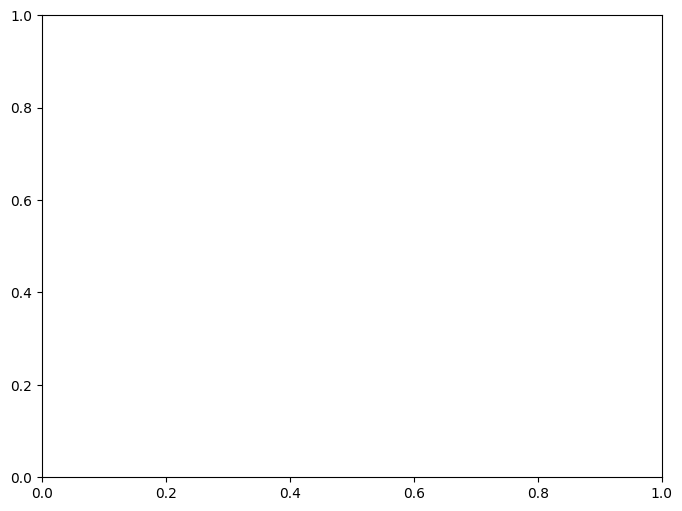

In [3]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

def calculate_maf_1000g(vcf_file):
    """
    使用 bcftools 动态计算次要等位基因频率（MAF）。
    """
    cmd = f"bcftools +fill-tags {vcf_file} -- -t AF | bcftools query -f '%CHROM\\t%POS\\t%REF\\t%ALT\\t[%AF]\\n'"
    output = subprocess.check_output(cmd, shell=True, executable="/bin/bash").decode().strip().split("\n")

    snp_data = []
    for line in output:
        chrom, pos, ref, alt, af = line.split("\t")
        try:
            af = float(af)
            maf = min(af, 1 - af)  # 次要等位基因频率
            snp_data.append((f"{chrom}:{pos}", maf))
        except ValueError:
            # 如果 AF 值无效，跳过该 SNP
            continue

    return pd.DataFrame(snp_data, columns=["SNP", "MAF"])

def plot_maf_distribution(maf_data, dataset_name="1000 Genomes"):
    """
    绘制次要等位基因频率（MAF）的分布直方图。
    """
    plt.figure(figsize=(8, 6))
    plt.hist(maf_data["MAF"], bins=50, alpha=0.7, color="blue", edgecolor="k")
    plt.xlabel("Minor Allele Frequency (MAF)")
    plt.ylabel("Frequency")
    plt.title(f"MAF Distribution in {dataset_name}")
    plt.grid()
    plt.show()

def main():
    # 1000 Genomes 的 VCF 文件路径
    vcf_file = "../data/1000g/merged_common_snps.vcf.gz"

    # 计算 1000 Genomes 的 MAF
    print("Calculating MAF for 1000 Genomes...")
    g1000_maf = calculate_maf_1000g(vcf_file)

    # 检查结果
    print(f"Number of SNPs processed: {len(g1000_maf)}")
    print(g1000_maf.head())

    # 绘制 MAF 分布直方图
    plot_maf_distribution(g1000_maf, dataset_name="1000 Genomes")

if __name__ == "__main__":
    main()


Index(['#Dist', 'Mean_r^2', 'Mean_D'', 'Sum_r^2', 'Sum_D'', 'NumberPairs'], dtype='object')


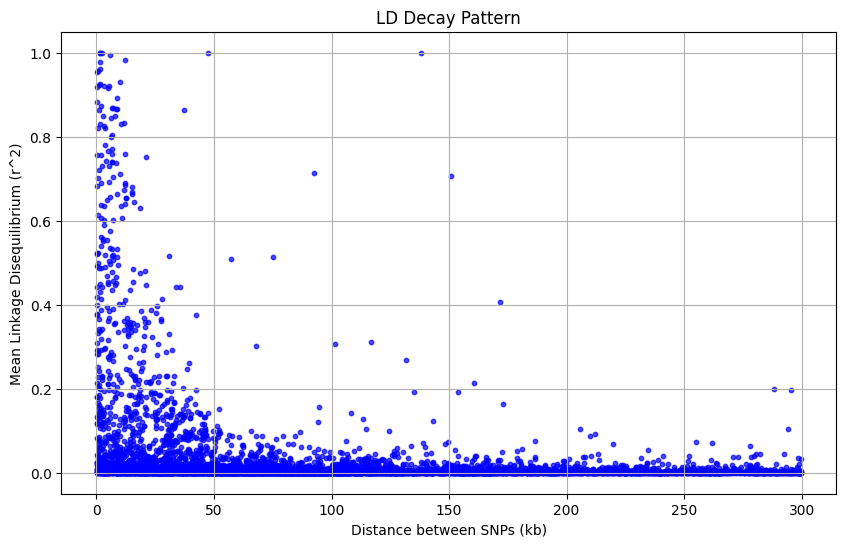

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
ld_data = pd.read_csv("../data/1000g/PopLDdecay/ld_chr1_output.stat", sep="\t")

# 确认列名并提取所需列
print(ld_data.columns)  # 查看列名
ld_data.rename(columns={"#Dist": "Distance", "Mean_r^2": "Mean_r2"}, inplace=True)

# 绘制 LD 衰减图
plt.figure(figsize=(10, 6))
plt.scatter(ld_data["Distance"] / 1000, ld_data["Mean_r2"], s=10, alpha=0.7, color="blue")
plt.xlabel("Distance between SNPs (kb)")
plt.ylabel("Mean Linkage Disequilibrium (r^2)")
plt.title("LD Decay Pattern")
plt.grid(True)
plt.savefig("ld_decay_chr1.png")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_ld_data(file_path, pop_name):
    """
    加载指定种群的 LD 数据，并添加种群名称。
    """
    ld_data = pd.read_csv(file_path, sep="\t")
    ld_data.rename(columns={"#Dist": "Distance", "Mean_r^2": "Mean_r2"}, inplace=True)
    ld_data["Population"] = pop_name
    return ld_data

def plot_ld_decay(ld_datasets, output_file="multi_pop_ld_decay.png"):
    """
    绘制多个种群的 LD 衰减曲线。
    """
    plt.figure(figsize=(10, 6))
    for ld_data in ld_datasets:
        plt.plot(ld_data["Distance"] / 1000, ld_data["Mean_r2"], label=ld_data["Population"].iloc[0])

    plt.xlabel("Distance between SNPs (kb)")
    plt.ylabel("Mean Linkage Disequilibrium (r^2)")
    plt.title("LD Decay Across Populations")
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()

def main():
    # 加载每个种群的 LD 数据
    ld_chb = load_ld_data("../data/1000g/PopLDdecay/ld_chr1_chb_output.stat", "CHB")
    ld_ceu = load_ld_data("../data/1000g/PopLDdecay/ld_chr1_ceu_output.stat", "CEU")
    print("CHB 数据预览:")
    print(ld_chb.head())
    print("CEU 数据预览:")
    print(ld_ceu.head())
    #ld_yri = load_ld_data("ld_chr1_yri_output.stat", "YRI")

    # 绘制多个种群的 LD 衰减曲线
    plot_ld_decay([ld_chb, ld_ceu], output_file="multi_pop_ld_decay.png")

if __name__ == "__main__":
    main()


CHB 数据预览:
Empty DataFrame
Columns: [Distance, Mean_r2, Mean_D', Sum_r^2, Sum_D', NumberPairs, Population]
Index: []
CEU 数据预览:
Empty DataFrame
Columns: [Distance, Mean_r2, Mean_D', Sum_r^2, Sum_D', NumberPairs, Population]
Index: []


IndexError: single positional indexer is out-of-bounds

<Figure size 1000x600 with 0 Axes>